In [2]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [3]:
#from rocket_euler import Rocket
from src.rocket import Rocket
from src.pos_rocket_vis import *
from LandMPC_template.nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [4]:
sim_time = 10 # simulation length in seconds
x0 = np.array([0, 0, 0, np.deg2rad(30), 0, 0, 0, 0, 0, 3.0, 2.0, 10.0]) # w, phi, v, p
x_ref = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 3.0])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)


H = 1.5 # horizon time (teste avec 3 pour l'experience)
nmpc = NmpcCtrl(rocket, H, xs, us, Ts)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
nx 12
nu 4


In [5]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)

Simulating time 0.00
xo [ 0.          0.          0.          0.52359878  0.          0.
  0.          0.          0.          3.          2.         10.        ]
Target xs: [1. 0. 3.]
Target us: [ 0.          0.         56.66666667  0.        ]
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   1.59ms ( 34.61us)   2.09ms ( 45.40us)        46
       nlp_g  |   4.19ms ( 89.17us)   4.28ms ( 91.01us)        47
  nlp_grad_f  |   1.20ms ( 70.65us)   1.21ms ( 70.93us)        17
  nlp_hess_l  |  42.79ms (  2.85ms)  45.89ms (  3.06ms)        15
   nlp_jac_g  |  15.19ms (893.65us)  15.67ms (921.98us)        17
       total  | 139.69ms (139.69ms) 150.14ms (150.14ms)         1
xo [-2.72020028e-02 -2.90599139e-03 -4.29582859e-03  5.22918720e-01
 -7.25937555e-05 -1.07420401e-04  5.05607563e-04 -1.71880496e-01
 -2.02027557e-01  3.00001274e+00  1.99570217e+00  9.99494882e+00]
Target xs: [1. 0. 3.]
Target us: [ 0.          0.         56.66666667  0.        ]
      solv

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

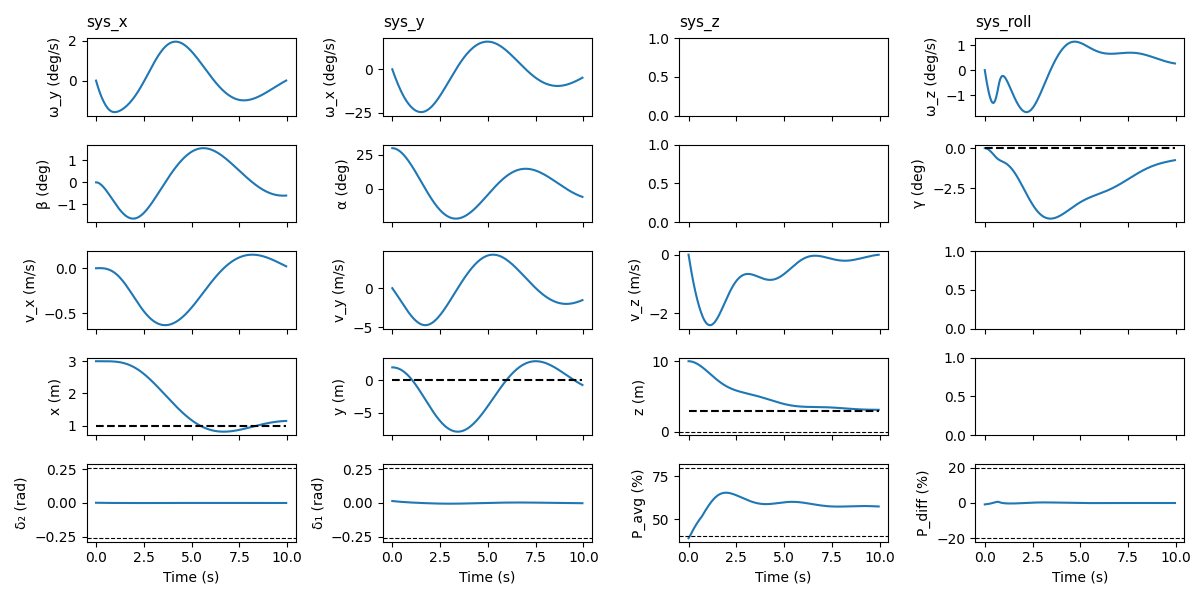

TypeError: plot_static_states_inputs() got an unexpected keyword argument 'T_ol'

In [ ]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)